In [1]:
# Start by creating a new Notebook for this assignment.
# setup import
import pandas as pd 
import wikipedia as wp
from bs4 import BeautifulSoup

# Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe
# enter the h1 element in wp.page(h1)
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")

# determine the index of your table
df = pd.read_html(html, header = 0)[0]

# Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
df = df[df.Borough != 'Not assigned']

# More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
df = df.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()

# If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.
for index, row in df.iterrows():
    if row['Neighbourhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']

# Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
df

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [2]:
# In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.
df.shape

(103, 3)

/Users/Preethi/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:418: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


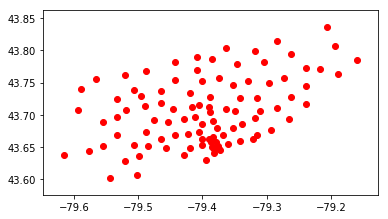

In [2]:
%matplotlib inline

import wikipedia as wp
import pandas as pd 

import requests
import io

from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

# Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe
# enter the h1 element in wp.page(h1)
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")

# determine the index of your table
df = pd.read_html(html, header = 0)[0]

# Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
df = df[df.Borough != 'Not assigned']

# More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
df = df.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()

# If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.
for index, row in df.iterrows():
    if row['Neighbourhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']

# in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.
url="http://cocl.us/Geospatial_data"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

# rename the first column to allow merging dataframes on Postcode
c.columns = ['Postcode', 'Latitude', 'Longitude']
df = pd.merge(c, df, on='Postcode')

# reorder column names and show the dataframe
df = df[['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude']]

# load latitude and longitude into geopandas dataframe
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')

# set up map
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='white', edgecolor='black')

# plot and show
gdf.plot(ax=ax, color='red')
plt.show()

In [7]:
import requests # library to handle requests
import lxml.html as lh
import bs4 as bs
import urllib.request

import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
url   = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
def scrape_table_bs4(cname,cols):
    page  = urllib.request.urlopen(url).read()
    soup  = bs.BeautifulSoup(page,'lxml')
    table = soup.find("table",class_=cname)
    header = [head.findAll(text=True)[0].strip() for head in table.find_all("th")]
    data   = [[td.findAll(text=True)[0].strip() for td in tr.find_all("td")]
              for tr in table.find_all("tr")]
    data    = [row for row in data if len(row) == cols]
    # Store data to this temporary dataframe
    raw_df = pd.DataFrame(data,columns=header)
    return raw_df

# -----------------------------------------------------
# Parsing using xpath.
# -----------------------------------------------------
def scrape_table_lxml(XPATH,cols):
    page = requests.get(url)
    doc = lh.fromstring(page.content)
    table_content = doc.xpath(XPATH)
    for table in table_content:
        headers = [th.text_content().strip() for th in table.xpath('//th')]
        headers = headers[0:3]
        data    = [[td.text_content().strip() for td in tr.xpath('td')] 
                   for tr in table.xpath('//tbody/tr')]
        data    = [row for row in data if len(row) == cols]
        raw_df = pd.DataFrame(data,columns=headers)
        return raw_df
#Test in beautifulSoup
raw_TorontoPostalCodes = scrape_table_bs4("wikitable",3)

#Test in lxml ( for xpath based extraction)
#raw_TorontoPostalCodes = scrape_table_lxml("/html/body/div[3]/div[3]/div[4]/div/table[1]",3)

print("# Toronto Postal codes stored in data")
print(raw_TorontoPostalCodes.info(verbose=True))
    # Only process the cells that have an assigned borough. 
# Ignore cells with a borough that is Not assigned.
# -----------------------------------------------------
TorontoPostalCodes=raw_TorontoPostalCodes[~raw_TorontoPostalCodes['Borough'].isin(['Not assigned'])]

# Sort and Reset index.
TorontoPostalCodes=TorontoPostalCodes.sort_values(by=['Postcode','Borough','Neighbourhood'], ascending=[1,1,1]).reset_index(drop=True)

# -----------------------------------------------------
# If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
# For example the value of the Borough and the Neighborhood columns will be Queen's Park.
# -----------------------------------------------------
TorontoPostalCodes.loc[TorontoPostalCodes['Neighbourhood'] == 'Not assigned', ['Neighbourhood']] = TorontoPostalCodes['Borough']
check_unassigned_post_state_sample = TorontoPostalCodes.loc[TorontoPostalCodes['Borough'] == 'Queen\'s Park']
#print('DEBUG:',check_unassigned_post_state_sample) ; # Print sample borough problem post state

# -----------------------------------------------------
# More than one neighborhood can exist in one postal code area. 
# For example, in the table on the Wikipedia page, you will notice that M5A is listed twice 
# and has two neighborhoods: Harbourfront and Regent Park. 
# These two rows will be combined into one row with the neighborhoods separated with a comma.
# -----------------------------------------------------
TorontoPostalCodes = TorontoPostalCodes.groupby(['Postcode','Borough'])['Neighbourhood'].apply(', '.join).reset_index()
TorontoPostalCodes


# Toronto Postal codes stored in data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 3 columns):
Postcode         288 non-null object
Borough          288 non-null object
Neighbourhood    288 non-null object
dtypes: object(3)
memory usage: 6.8+ KB
None


,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Highland Creek, Port Union, Rouge Hill"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [8]:
TorontoPostalCodes.to_csv('Toronto.TASK_1_df.csv',index=False)

In [9]:
task1_data_csv = "Toronto.TASK_1_df.csv"
TorontoPostalCodes = pd.read_csv(task1_data_csv).set_index("Postcode")
TorontoPostalCodes.rename_axis("Postal Code", axis='index', inplace=True)
TorontoPostalCodes.head()

,Borough,Neighbourhood
Postal Code,,
M1B,Scarborough,"Malvern, Rouge"
M1C,Scarborough,"Highland Creek, Port Union, Rouge Hill"
M1E,Scarborough,"Guildwood, Morningside, West Hill"
M1G,Scarborough,Woburn
M1H,Scarborough,Cedarbrae


In [10]:
toronto_geocsv = 'https://cocl.us/Geospatial_data'
!wget -q -O 'toronto_m.geospatial_data.csv' toronto_geocsv
geocsv_data = pd.read_csv(toronto_geocsv).set_index("Postal Code")
geocsv_data.head()

/bin/sh: wget: command not found


,Latitude,Longitude
Postal Code,,
M1B,43.806686,-79.194353
M1C,43.784535,-79.160497
M1E,43.763573,-79.188711
M1G,43.770992,-79.216917
M1H,43.773136,-79.239476


In [11]:
toronto_neighborhoods = TorontoPostalCodes.join(geocsv_data)
toronto_neighborhoods.head()

,Borough,Neighbourhood,Latitude,Longitude
Postal Code,,,,
M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
M1C,Scarborough,"Highland Creek, Port Union, Rouge Hill",43.784535,-79.160497
M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
M1G,Scarborough,Woburn,43.770992,-79.216917
M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [12]:
toronto_neighborhoods.to_csv('Toronto.TASK_II_df.csv',index=False)

In [13]:
toronto_neighborhoods.shape

(103, 4)